## Model 4

In [1]:
import os
os.chdir("E:\\DATA SCIENCE TERM-1\\Machine Learning-1\\ML 1 Assignment")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as stm

In [3]:
house_train = pd.read_csv("wk3_kc_house_train_data.csv")

In [4]:
house_train.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208
5,9297300055,20150124T000000,650000.0,4,3.00,2950,5000,2.0,0,3,...,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
6,6865200140,20140529T000000,485000.0,4,1.00,1600,4300,1.5,0,0,...,7,1600,0,1916,0,98103,47.6648,-122.343,1610,4300
7,6300500875,20140514T000000,385000.0,4,1.75,1620,4980,1.0,0,0,...,7,860,760,1947,0,98133,47.7025,-122.341,1400,4980
8,7137970340,20140703T000000,285000.0,5,2.50,2270,6300,2.0,0,0,...,8,2270,0,1995,0,98092,47.3266,-122.169,2240,7005
9,8091400200,20140516T000000,252700.0,2,1.50,1070,9643,1.0,0,0,...,7,1070,0,1985,0,98030,47.3533,-122.166,1220,8386


In [5]:
house_train['age'] = 2020 - house_train.yr_built

In [6]:
house_train['price_log'] = np.log(house_train.price)

In [7]:
house_train['sqft_living_log'] = np.log(house_train.sqft_living)

In [8]:
house_train['sqft_lot_log'] = np.log(house_train.sqft_lot)

In [9]:
house_train['sqft_living15_log'] = np.log(house_train.sqft_living15)

In [10]:
house_train['sqft_lot15_log'] = np.log(house_train.sqft_lot15)

In [11]:
house_train['sqft_above_log'] = np.log(house_train.sqft_above)

In [12]:
mask = house_train['sqft_basement'] >= 1
house_train.loc[mask, 'sqft_basement_bin'] = 1

In [13]:
mask = house_train['sqft_basement'] < 1
house_train.loc[mask, 'sqft_basement_bin'] = 0

In [14]:
house_train.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_living15,sqft_lot15,age,price_log,sqft_living_log,sqft_lot_log,sqft_living15_log,sqft_lot15_log,sqft_above_log,sqft_basement_bin
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1360,5000,55,13.311329,7.580700,8.517193,7.215240,8.517193,6.956545,1.0
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,4760,101930,19,14.018451,8.597851,11.532042,8.468003,11.532042,8.266164,1.0
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,1330,6000,78,13.056224,7.056175,8.699515,7.192934,8.699515,6.756932,1.0
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,1780,12697,93,12.644328,7.265430,9.898525,7.484369,9.449121,7.265430,0.0
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,1370,10208,43,12.899220,7.222566,9.177817,7.222566,9.230927,7.222566,0.0
5,9297300055,20150124T000000,650000.0,4,3.00,2950,5000,2.0,0,3,...,2140,4000,41,13.384728,7.989560,8.517193,7.668561,8.294050,7.590852,1.0
6,6865200140,20140529T000000,485000.0,4,1.00,1600,4300,1.5,0,0,...,1610,4300,104,13.091904,7.377759,8.366370,7.383989,8.366370,7.377759,0.0
7,6300500875,20140514T000000,385000.0,4,1.75,1620,4980,1.0,0,0,...,1400,4980,73,12.860999,7.390181,8.513185,7.244228,8.513185,6.756932,1.0
8,7137970340,20140703T000000,285000.0,5,2.50,2270,6300,2.0,0,0,...,2240,7005,25,12.560244,7.727535,8.748305,7.714231,8.854379,7.727535,0.0
9,8091400200,20140516T000000,252700.0,2,1.50,1070,9643,1.0,0,0,...,1220,8386,35,12.439958,6.975414,9.173988,7.106606,9.034319,6.975414,0.0


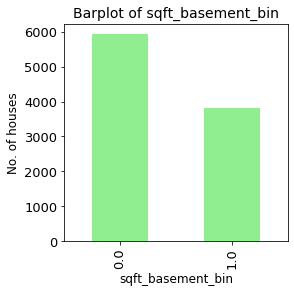

In [15]:
house_train['sqft_basement_bin'].value_counts().plot(kind='bar', figsize=(4,4),
                                        color="lightgreen", fontsize=13)

plt.xlabel("sqft_basement_bin", fontsize=12)
plt.ylabel("No. of houses", fontsize=12)
plt.title("Barplot of sqft_basement_bin", fontsize=14)

plt.show()

In [16]:
house_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 29 columns):
id                   9761 non-null int64
date                 9761 non-null object
price                9761 non-null float64
bedrooms             9761 non-null int64
bathrooms            9761 non-null float64
sqft_living          9761 non-null int64
sqft_lot             9761 non-null int64
floors               9761 non-null float64
waterfront           9761 non-null int64
view                 9761 non-null int64
condition            9761 non-null int64
grade                9761 non-null int64
sqft_above           9761 non-null int64
sqft_basement        9761 non-null int64
yr_built             9761 non-null int64
yr_renovated         9761 non-null int64
zipcode              9761 non-null int64
lat                  9761 non-null float64
long                 9761 non-null float64
sqft_living15        9761 non-null int64
sqft_lot15           9761 non-null int64
age                  

In [17]:
unwanted = ['id','date','price','sqft_living','sqft_lot','sqft_living15','sqft_lot15','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long']
house_train.drop(unwanted,axis=1,inplace=True)

In [18]:
X = house_train.drop(["price_log"], axis = 1)
y = house_train['price_log']

In [19]:
X.head(10)

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,age,sqft_living_log,sqft_lot_log,sqft_living15_log,sqft_lot15_log,sqft_above_log,sqft_basement_bin
0,4,3.00,1.0,0,0,5,7,55,7.580700,8.517193,7.215240,8.517193,6.956545,1.0
1,4,4.50,1.0,0,0,3,11,19,8.597851,11.532042,8.468003,11.532042,8.266164,1.0
2,2,1.00,1.0,0,0,4,7,78,7.056175,8.699515,7.192934,8.699515,6.756932,1.0
3,3,1.00,1.5,0,0,4,7,93,7.265430,9.898525,7.484369,9.449121,7.265430,0.0
4,3,1.75,1.0,0,0,4,7,43,7.222566,9.177817,7.222566,9.230927,7.222566,0.0
5,4,3.00,2.0,0,3,3,9,41,7.989560,8.517193,7.668561,8.294050,7.590852,1.0
6,4,1.00,1.5,0,0,4,7,104,7.377759,8.366370,7.383989,8.366370,7.377759,0.0
7,4,1.75,1.0,0,0,4,7,73,7.390181,8.513185,7.244228,8.513185,6.756932,1.0
8,5,2.50,2.0,0,0,3,8,25,7.727535,8.748305,7.714231,8.854379,7.727535,0.0
9,2,1.50,1.0,0,0,3,7,35,6.975414,9.173988,7.106606,9.034319,6.975414,0.0


In [20]:
y.head(10)

0    13.311329
1    14.018451
2    13.056224
3    12.644328
4    12.899220
5    13.384728
6    13.091904
7    12.860999
8    12.560244
9    12.439958
Name: price_log, dtype: float64

In [21]:
x = stm.add_constant(X)
x.head()

C:\Users\lenovo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,bedrooms,bathrooms,floors,waterfront,view,condition,grade,age,sqft_living_log,sqft_lot_log,sqft_living15_log,sqft_lot15_log,sqft_above_log,sqft_basement_bin
0,1.0,4,3.00,1.0,0,0,5,7,55,7.580700,8.517193,7.215240,8.517193,6.956545,1.0
1,1.0,4,4.50,1.0,0,0,3,11,19,8.597851,11.532042,8.468003,11.532042,8.266164,1.0
2,1.0,2,1.00,1.0,0,0,4,7,78,7.056175,8.699515,7.192934,8.699515,6.756932,1.0
3,1.0,3,1.00,1.5,0,0,4,7,93,7.265430,9.898525,7.484369,9.449121,7.265430,0.0
4,1.0,3,1.75,1.0,0,0,4,7,43,7.222566,9.177817,7.222566,9.230927,7.222566,0.0


In [22]:
mod4 = stm.OLS(y,x).fit()
mod4.params

const                7.042191
bedrooms            -0.023274
bathrooms            0.062321
floors               0.074131
waterfront           0.432362
view                 0.041767
condition            0.038148
grade                0.211996
age                  0.005759
sqft_living_log      0.191988
sqft_lot_log        -0.013909
sqft_living15_log    0.262820
sqft_lot15_log      -0.042075
sqft_above_log       0.111263
sqft_basement_bin    0.098658
dtype: float64

In [23]:
mod4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     1424.
Date:                Mon, 25 May 2020   Prob (F-statistic):               0.00
Time:                        21:52:05   Log-Likelihood:                -2247.6
No. Observations:                9761   AIC:                             4525.
Df Residuals:                    9746   BIC:                             4633.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.0422      0.105     66.976      0.000       6.836       7.248
bedrooms             -0.0233      0.004     -5.541      0.000      -0.032      -0.015
bathrooms             0.0623      0.007      8.719      0.000       0.048       0.076
floors                0.0741      0.009      8.330      0.000       0.057       0.092
waterfront            0.4324      0.037     11.668      0.000       0.360       0.505
view                  0.0418      0.005      9.096      0.000       0.033       0.051
condition             0.0381      0.005      7.326      0.000       0.028       0.048
grade                 0.2120      0.005     46.409      0.000       0.203       0.221
age                   0.0058      0.000     40.964      0.000       0.005       0.006
sqft_living_log       0.1920      0.032      5.943      0.000       0.129       0.255
sqft_lot_log         -0.0139      0.009     -1.542      0.123      -0.032       0.004
sqft_living15_log     0.2628      0.016     16.725      0.000       0.232       0.294
sqft_lot15_log       -0.0421      0.010     -4.272      0.000      -0.061      -0.023
sqft_above_log        0.1113      0.032      3.480      0.001       0.049       0.174
sqft_basement_bin     0.0987      0.014      7.297      0.000       0.072       0.125
==============================================================================
Omnibus:                       19.791   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.127
Skew:                          -0.019   Prob(JB):                     5.77e-06
Kurtosis:                       3.241   Cond. No.                     2.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Validating Model 4

In [24]:
house_valid = pd.read_csv("wk3_kc_house_valid_data.csv")

In [25]:
house_valid.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
4,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
5,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
6,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
7,1736800520,20150403T000000,662500.0,3,2.50,3560,9796,1.0,0,0,...,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
8,1875500060,20140731T000000,395000.0,3,2.00,1890,14040,2.0,0,0,...,7,1890,0,1994,0,98019,47.7277,-121.962,1890,14018
9,7983200060,20150424T000000,230000.0,3,1.00,1250,9774,1.0,0,0,...,7,1250,0,1969,0,98003,47.3343,-122.306,1280,8850


In [26]:
house_valid.shape

(9635, 21)

In [27]:
house_valid['age'] = 2020 - house_valid.yr_built

In [28]:
house_valid['price_log'] = np.log(house_valid.price)

In [29]:
house_valid['sqft_living_log'] = np.log(house_valid.sqft_living)

In [30]:
house_valid['sqft_living15_log'] = np.log(house_valid.sqft_living15)

In [31]:
house_valid['sqft_lot_log'] = np.log(house_valid.sqft_lot)

In [32]:
house_valid['sqft_lot_log15'] = np.log(house_valid.sqft_lot15)

In [33]:
house_valid['sqft_above_log'] = np.log(house_valid.sqft_above)

In [34]:
mask = house_valid['sqft_basement'] >= 1
house_valid.loc[mask, 'sqft_basement_bin'] = 1

In [35]:
mask = house_valid['sqft_basement'] < 1
house_valid.loc[mask, 'sqft_basement_bin'] = 0

In [36]:
house_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9635 entries, 0 to 9634
Data columns (total 29 columns):
id                   9635 non-null int64
date                 9635 non-null object
price                9635 non-null float64
bedrooms             9635 non-null int64
bathrooms            9635 non-null float64
sqft_living          9635 non-null int64
sqft_lot             9635 non-null int64
floors               9635 non-null float64
waterfront           9635 non-null int64
view                 9635 non-null int64
condition            9635 non-null int64
grade                9635 non-null int64
sqft_above           9635 non-null int64
sqft_basement        9635 non-null int64
yr_built             9635 non-null int64
yr_renovated         9635 non-null int64
zipcode              9635 non-null int64
lat                  9635 non-null float64
long                 9635 non-null float64
sqft_living15        9635 non-null int64
sqft_lot15           9635 non-null int64
age                  

In [37]:
unwanted = ['id','date','price','sqft_living','sqft_lot','sqft_living15','sqft_lot15','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long']
house_valid.drop(unwanted,axis=1,inplace=True)

In [38]:
X_valid = house_valid.drop(["price_log"], axis = 1)
y_validl = house_valid['price_log']

In [39]:
X_valid.head(10)

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,age,sqft_living_log,sqft_living15_log,sqft_lot_log,sqft_lot_log15,sqft_above_log,sqft_basement_bin
0,3,1.00,1.0,0,0,3,7,65,7.073270,7.200425,8.639411,8.639411,7.073270,0.0
1,3,2.25,2.0,0,0,3,7,69,7.851661,7.432484,8.887653,8.941022,7.682482,1.0
2,2,1.00,1.0,0,0,3,6,87,6.646391,7.908387,9.210340,8.994917,6.646391,0.0
3,3,2.00,1.0,0,0,3,8,33,7.426549,7.495542,8.997147,8.923058,7.426549,0.0
4,3,2.25,2.0,0,0,3,7,25,7.447168,7.713338,8.827468,8.827468,7.447168,0.0
5,3,1.50,1.0,0,0,3,7,57,6.966024,7.408531,9.181015,9.181015,6.966024,0.0
6,3,1.00,1.0,0,0,3,7,60,7.484369,7.484369,8.918650,9.001223,6.956545,1.0
7,3,2.50,1.0,0,0,3,8,55,8.177516,7.700748,9.189729,9.096612,7.528332,1.0
8,3,2.00,2.0,0,0,3,7,26,7.544332,7.544332,9.549666,9.548097,7.544332,0.0
9,3,1.00,1.0,0,0,4,7,51,7.130899,7.154615,9.187481,9.088173,7.130899,0.0


In [40]:
y_validl.head(10)

0    12.309982
1    13.195614
2    12.100712
3    13.142166
4    12.458775
5    12.583995
6    12.343658
7    13.403776
8    12.886641
9    12.345835
Name: price_log, dtype: float64

In [41]:
x_valid = stm.add_constant(X_valid)
x_valid.head()

,const,bedrooms,bathrooms,floors,waterfront,view,condition,grade,age,sqft_living_log,sqft_living15_log,sqft_lot_log,sqft_lot_log15,sqft_above_log,sqft_basement_bin
0,1.0,3,1.00,1.0,0,0,3,7,65,7.073270,7.200425,8.639411,8.639411,7.073270,0.0
1,1.0,3,2.25,2.0,0,0,3,7,69,7.851661,7.432484,8.887653,8.941022,7.682482,1.0
2,1.0,2,1.00,1.0,0,0,3,6,87,6.646391,7.908387,9.210340,8.994917,6.646391,0.0
3,1.0,3,2.00,1.0,0,0,3,8,33,7.426549,7.495542,8.997147,8.923058,7.426549,0.0
4,1.0,3,2.25,2.0,0,0,3,7,25,7.447168,7.713338,8.827468,8.827468,7.447168,0.0


In [42]:
y_vpred_log = mod4.predict(x_valid)
y_vpred_log

0       13.033519
1       13.573796
2       12.967297
3       13.308650
4       13.102941
          ...    
9630    12.769530
9631    12.902304
9632    12.885968
9633    13.246696
9634    13.058451
Length: 9635, dtype: float64

In [43]:
y_vpred = np.exp(y_vpred_log)
y_vpred

0       457493.854818
1       785280.281281
2       428179.364166
3       602384.052788
4       490382.658728
            ...      
9630    351347.245949
9631    401235.607006
9632    394734.100283
9633    566196.371531
9634    469043.497130
Length: 9635, dtype: float64

In [44]:
y_valid = np.exp(y_validl)
y_valid

0       221900.0
1       538000.0
2       180000.0
3       510000.0
4       257500.0
          ...   
9630    224000.0
9631    475000.0
9632    360000.0
9633    400000.0
9634    400000.0
Name: price_log, Length: 9635, dtype: float64

In [45]:
type(y_valid)

pandas.core.series.Series

In [46]:
type(y_vpred)

pandas.core.series.Series

In [47]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [48]:
rmse4 = sqrt(mean_squared_error(y_valid, y_vpred))
rmse4

440291.42379191093

In [49]:
rmse4 = np.sqrt(np.mean((np.array(y_valid)-np.array(y_vpred))**2)) #RMSE
rmse4

440291.42379191093